# **Salary Prediction Model**

---




## Loading the Dataset

In [162]:
import numpy as np
import pandas as pd

In [163]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohithsairamreddy/salary-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-data


In [164]:
df = pd.read_csv("/kaggle/input/salary-data/Salary_Data.csv")

df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Data Preprocessing





> Check Data Types and Basic Statistics



In [165]:
print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
df.describe().round(2)


Data Types:
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Basic Statistics:


,Age,Years of Experience,Salary
count,6702.00,6701.00,6699.00
mean,33.62,8.09,115326.96
std,7.61,6.06,52786.18
min,21.00,0.00,350.00
25%,28.00,3.00,70000.00
50%,32.00,7.00,115000.00
75%,38.00,12.00,160000.00
max,62.00,34.00,250000.00


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [167]:
df.shape

(6704, 6)



> Handling Missing Values



In [168]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    empty_count = (df[col] == '').sum()
    print(f"{col}: NaN = {null_count}, Empty = {empty_count}")

df = df.dropna()

Age: NaN = 2, Empty = 0
Gender: NaN = 2, Empty = 0
Education Level: NaN = 3, Empty = 0
Job Title: NaN = 2, Empty = 0
Years of Experience: NaN = 3, Empty = 0
Salary: NaN = 5, Empty = 0


In [169]:
print("Any NaNs left? ", df.isnull().any().any())
print("Any empty strings left? ", (df == '').any().any())


Any NaNs left?  False
Any empty strings left?  False


In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Suppress specific FutureWarnings from seaborn
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn._oldcore')
# Suppress FutureWarning about observed parameter in pandas groupby
warnings.filterwarnings('ignore', category=FutureWarning, message='.*observed=False.*')
warnings.filterwarnings('ignore', category = RuntimeWarning)

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)



> Overall Salary Distribution



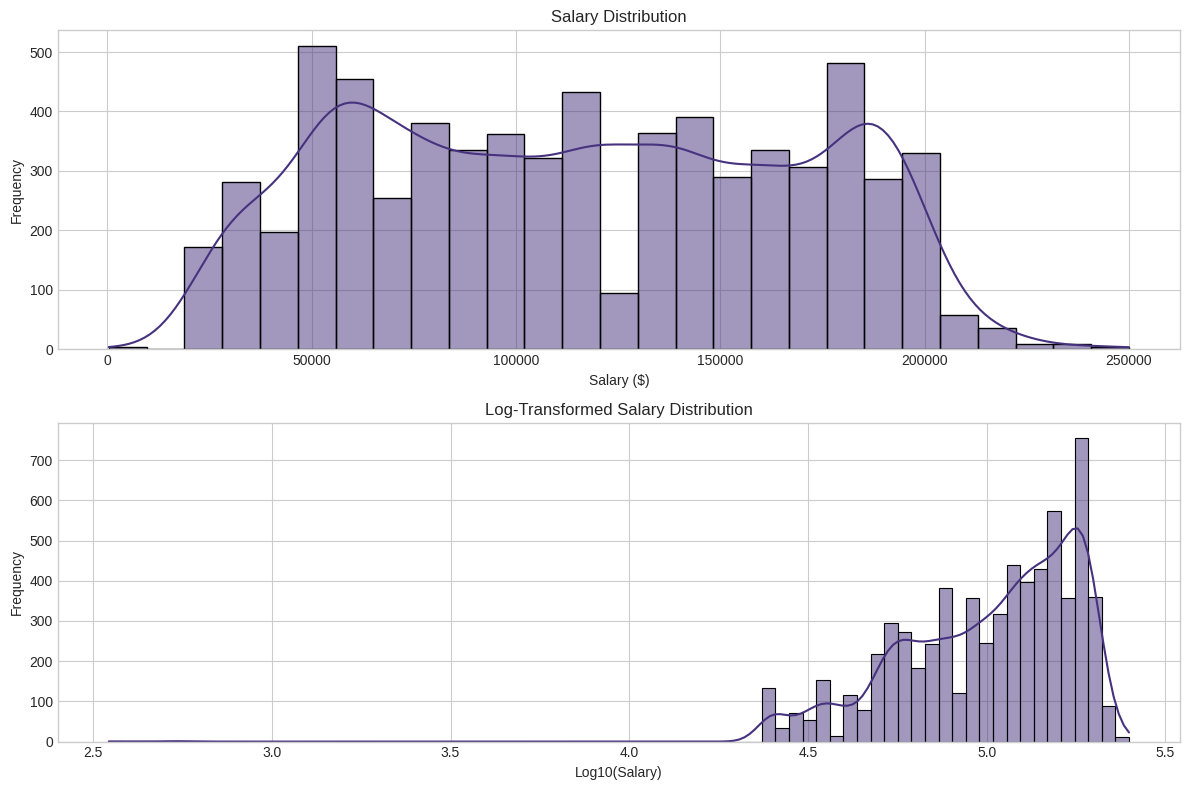

,count,mean,std,min,25%,50%,75%,max
Salary,6698.0,115329.253061,52789.792507,350.0,70000.0,115000.0,160000.0,250000.0


In [171]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
sns.histplot(np.log10(df['Salary']), kde=True)
plt.title('Log-Transformed Salary Distribution')
plt.xlabel('Log10(Salary)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Basic statistics about salary
salary_stats = df['Salary'].describe().to_frame().T
salary_stats

## Exploratory Data Analysis (EDA)



> Check for Outliers in Salary



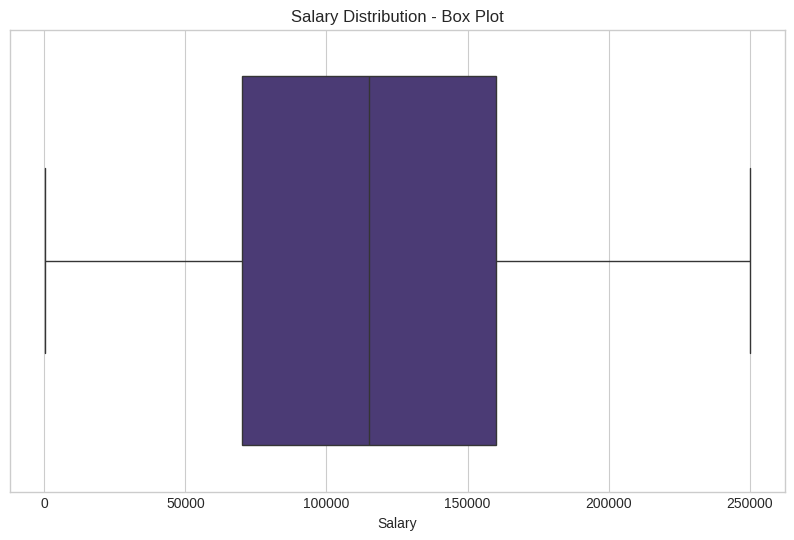

Removed 0 outliers


In [172]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'])
plt.title('Salary Distribution - Box Plot')
plt.show()

# Remove any extreme outliers
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

df_no_outliers = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
print(f"Removed {df.shape[0] - df_no_outliers.shape[0]} outliers")

df_clean = df_no_outliers.copy()



> Analyzing Distributions, Trends, and Patterns



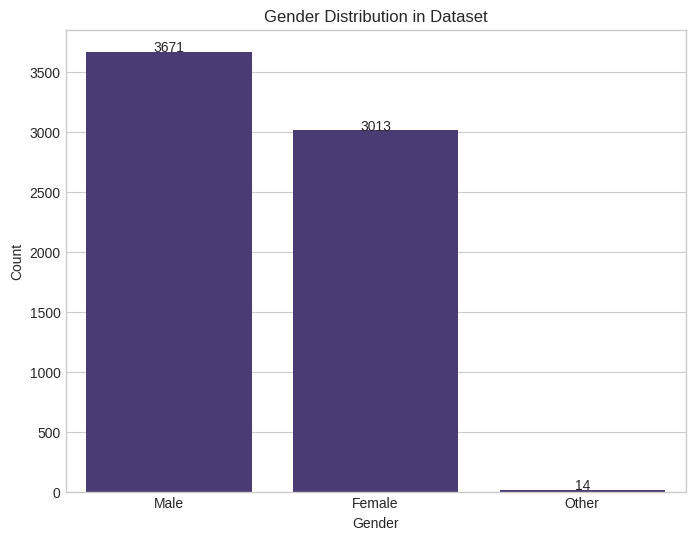

Salary Statistics by Gender:



,mean,median,std,count
Gender,,,,
Female,107888.998672,105000.0,52723.610035,3013
Male,121395.697630,120000.0,52098.626225,3671
Other,125869.857143,158610.0,44242.382776,14


In [173]:
# Gender distribution in the dataset
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution in Dataset')
plt.ylabel('Count')

# Add count labels
for i, count in enumerate(gender_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()

# Gender-based salary differences
gender_salary = df.groupby('Gender')['Salary'].agg(['mean', 'median', 'std', 'count'])
print("Salary Statistics by Gender:\n")
gender_salary

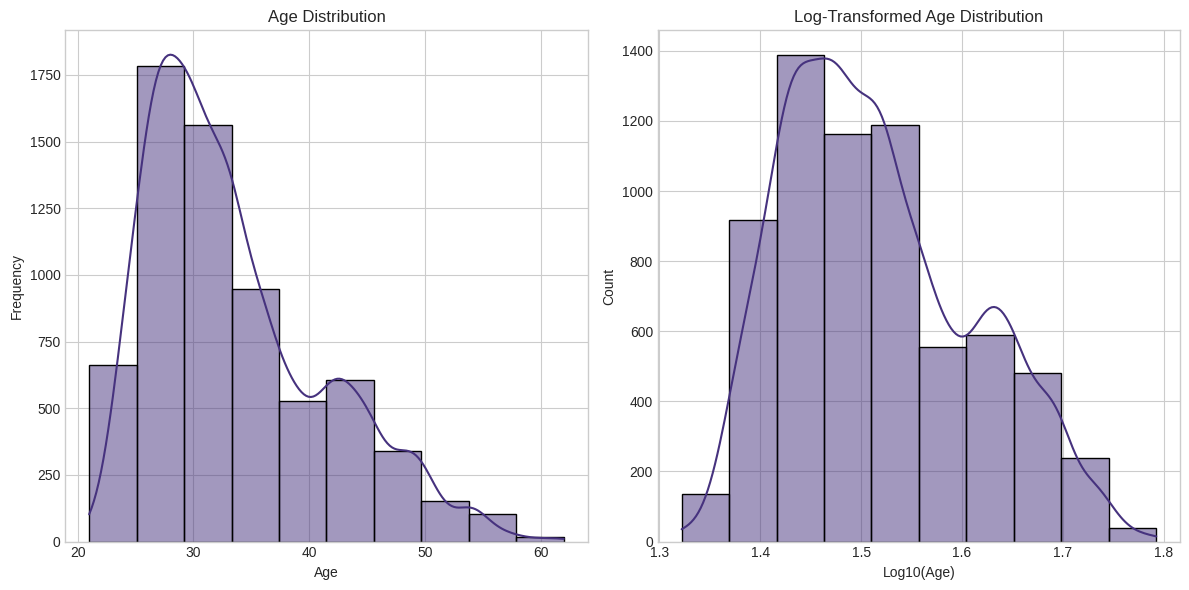

In [174]:
# Age distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(np.log10(df['Age']), kde=True, bins=10)
plt.title('Log-Transformed Age Distribution')
plt.xlabel('Log10(Age)')
plt.tight_layout()
plt.show()

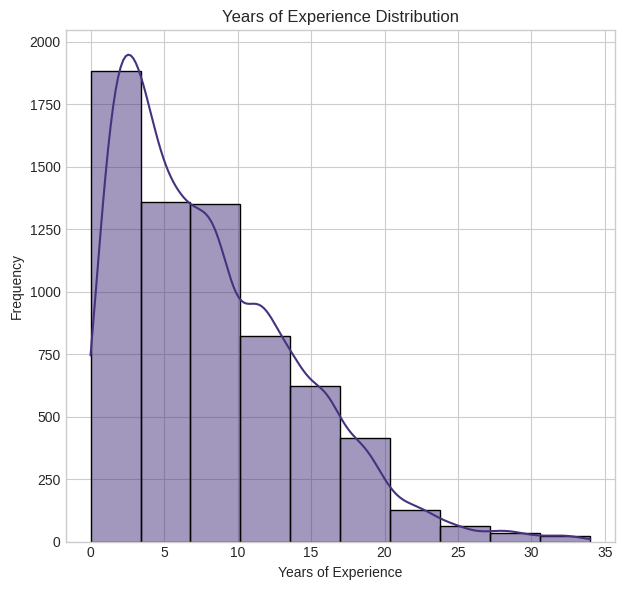

In [175]:
# Experience distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Years of Experience'], kde=True, bins=10)
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


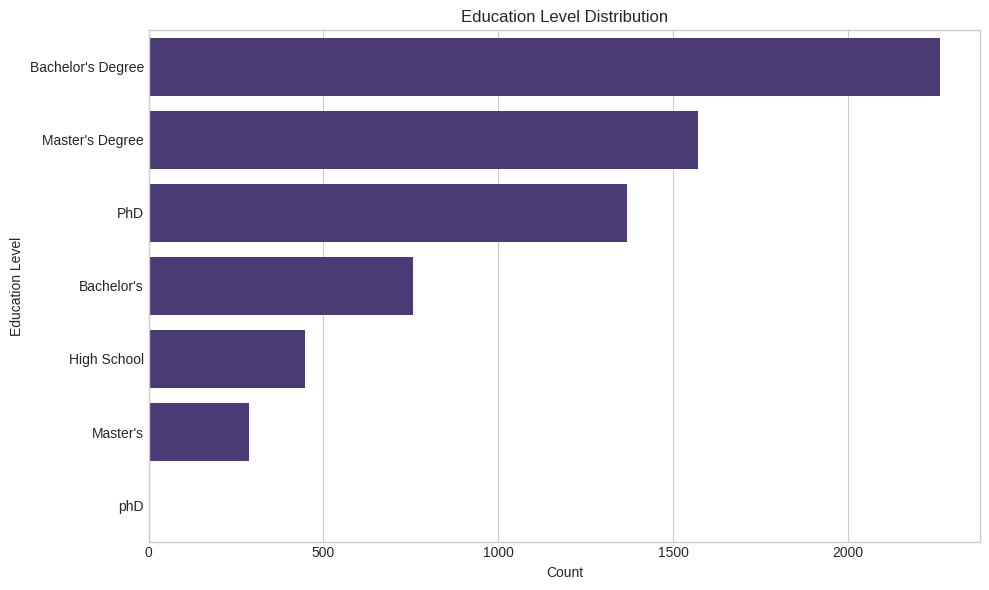

Salary Statistics by Education Level:



,mean,median,std,count
Education Level,,,,
PhD,165684.828947,170000.0,34330.096351,1368
Master's,157604.166667,177500.0,39864.267750,288
Master's Degree,125075.333969,122000.0,38732.484980,1572
Bachelor's,124767.658730,130000.0,46697.558848,756
phD,120000.000000,120000.0,NaN,1
Bachelor's Degree,85174.886093,75000.0,38387.390981,2265
High School,36706.694196,30000.0,22549.129999,448


In [176]:
# Education level distribution
edu_counts = df['Education Level'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(y='Education Level', data=df, order=edu_counts.index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Education level-based salary statistics
edu_salary = df.groupby('Education Level')['Salary'].agg(['mean', 'median', 'std', 'count'])
print("Salary Statistics by Education Level:\n")
edu_salary.sort_values(by='mean', ascending=False)

## Feature Engineering



> Creating New Features



In [177]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create experience groups
exp_bins = [0, 3, 6, 10, 15, 30]
exp_labels = ['0-2', '3-5', '6-9', '10-14', '15+']
df['Experience_Group'] = pd.cut(df['Years of Experience'], bins=exp_bins, labels=exp_labels, right=False)

# Print the updated dataframe
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age_Group,Experience_Group
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,30-39,3-5
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,20-29,3-5
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,40-49,15+
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,30-39,6-9
4,52.0,Male,Master's,Director,20.0,200000.0,50-59,15+


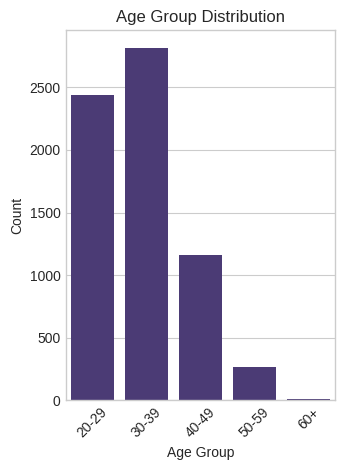

In [178]:
# Age Group distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Age_Group', data=df, order=labels)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

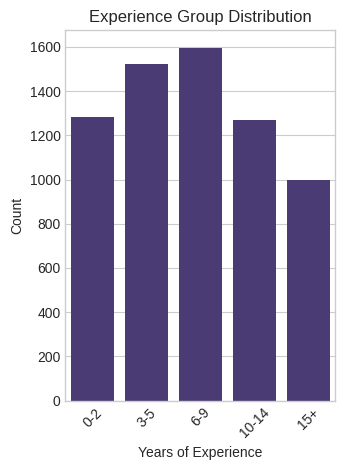

In [179]:
# Experience Group distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Experience_Group', data=df, order=exp_labels)
plt.title('Experience Group Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

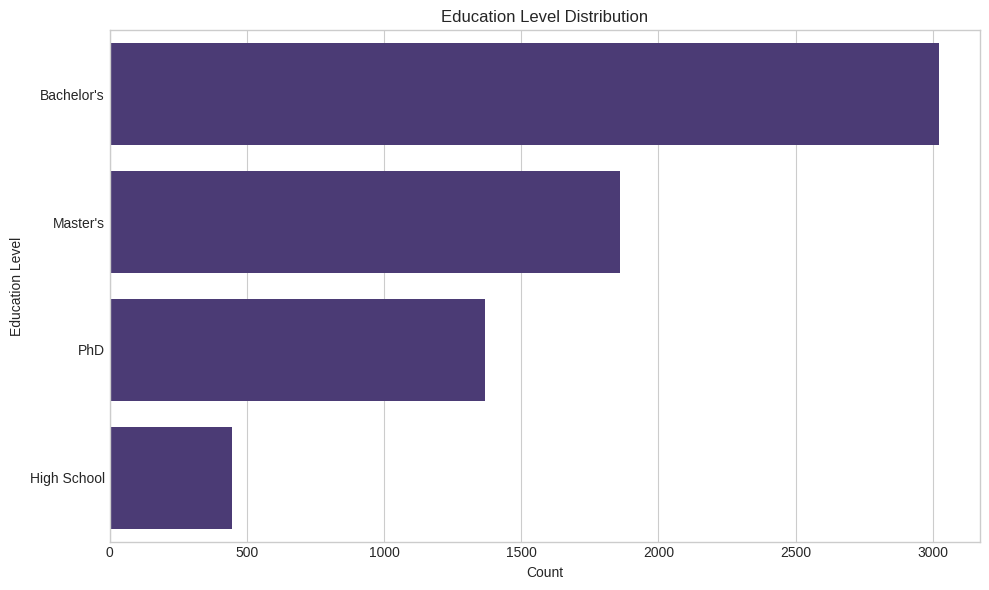

Salary Statistics by Education Level:



,mean,median,std,count
Education Level,,,,
PhD,165651.457999,170000.0,34339.751664,1369
Master's,130112.056452,130000.0,40640.818933,1860
Bachelor's,95082.908640,80000.0,44091.790154,3021
High School,36706.694196,30000.0,22549.129999,448


In [180]:

df['Education Level'] = df['Education Level'].replace("phD", "PhD")
df['Education Level'] = df['Education Level'].replace("Bachelor's Degree", "Bachelor's")
df['Education Level'] = df['Education Level'].replace("Master's Degree", "Master's")

# Education level distribution
edu_counts = df['Education Level'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(y='Education Level', data=df, order=edu_counts.index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Education level-based salary statistics
edu_salary = df.groupby('Education Level')['Salary'].agg(['mean', 'median', 'std', 'count'])
print("Salary Statistics by Education Level:\n")
edu_salary.sort_values(by='mean', ascending=False)

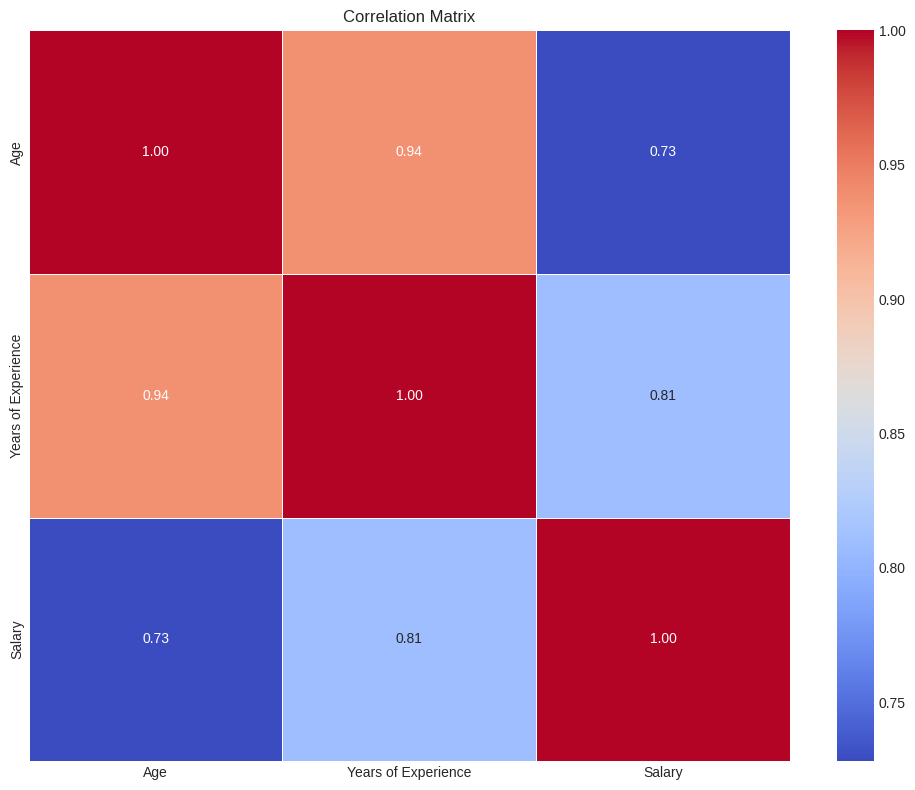

Correlation Matrix:


,Age,Years of Experience,Salary
Age,1.000000,0.937725,0.728061
Years of Experience,0.937725,1.000000,0.808968
Salary,0.728061,0.808968,1.000000


In [181]:
# Correlation between numerical variables
numeric_df = df[['Age', 'Years of Experience', 'Salary']]
correlation = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
correlation

In [182]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    empty_count = (df[col] == '').sum()
    print(f"{col}: NaN = {null_count}, Empty = {empty_count}")


Age: NaN = 0, Empty = 0
Gender: NaN = 0, Empty = 0
Education Level: NaN = 0, Empty = 0
Job Title: NaN = 0, Empty = 0
Years of Experience: NaN = 0, Empty = 0
Salary: NaN = 0, Empty = 0
Age_Group: NaN = 0, Empty = 0
Experience_Group: NaN = 29, Empty = 0


In [183]:
# Replace empty strings with NaN first
df.replace('', pd.NA, inplace=True)

# Drop rows with any NaN
df.dropna(inplace=True)


In [184]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    empty_count = (df[col] == '').sum()
    print(f"{col}: NaN = {null_count}, Empty = {empty_count}")

df.info()

Age: NaN = 0, Empty = 0
Gender: NaN = 0, Empty = 0
Education Level: NaN = 0, Empty = 0
Job Title: NaN = 0, Empty = 0
Years of Experience: NaN = 0, Empty = 0
Salary: NaN = 0, Empty = 0
Age_Group: NaN = 0, Empty = 0
Experience_Group: NaN = 0, Empty = 0
<class 'pandas.core.frame.DataFrame'>
Index: 6669 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6669 non-null   float64 
 1   Gender               6669 non-null   object  
 2   Education Level      6669 non-null   object  
 3   Job Title            6669 non-null   object  
 4   Years of Experience  6669 non-null   float64 
 5   Salary               6669 non-null   float64 
 6   Age_Group            6669 non-null   category
 7   Experience_Group     6669 non-null   category
dtypes: category(2), float64(3), object(3)
memory usage: 378.2+ KB


## Model Selection & Training

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import joblib


In [186]:
!pip install catboost




> Spliting the Data into Training and Testing



In [187]:
# Features and target
X = df[['Gender', 'Education Level', 'Job Title', 'Age_Group', 'Experience_Group']]
y = df['Salary']

# Categorical columns
categorical_cols = ['Gender', 'Education Level', 'Job Title', 'Age_Group', 'Experience_Group']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector': SVR(),
    'KNN': KNeighborsRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}


results = {}
for name, model in models.items():
    if name == "CatBoost":
      cat_features = ['Gender', 'Education Level', 'Job Title', 'Age_Group', 'Experience_Group']

      model.fit(X_train, y_train, cat_features=cat_features)
      y_pred = model.predict(X_test)
    else:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        model = pipeline  # Store full pipeline for saving

    mse = mean_squared_error(y_test, y_pred)
    results[name] = {
        'model': model,
        'mse': mse
    }
    print(f"{name}: MSE = {mse:.2f}")


best_model_name = min(results, key=lambda name: results[name]['mse'])

Linear Regression: MSE = 393564728.47
Random Forest: MSE = 211203346.80
Gradient Boosting: MSE = 342595184.49
Support Vector: MSE = 2694309976.84
KNN: MSE = 322267667.64
CatBoost: MSE = 212162543.38




> Comparing the Performance of Models



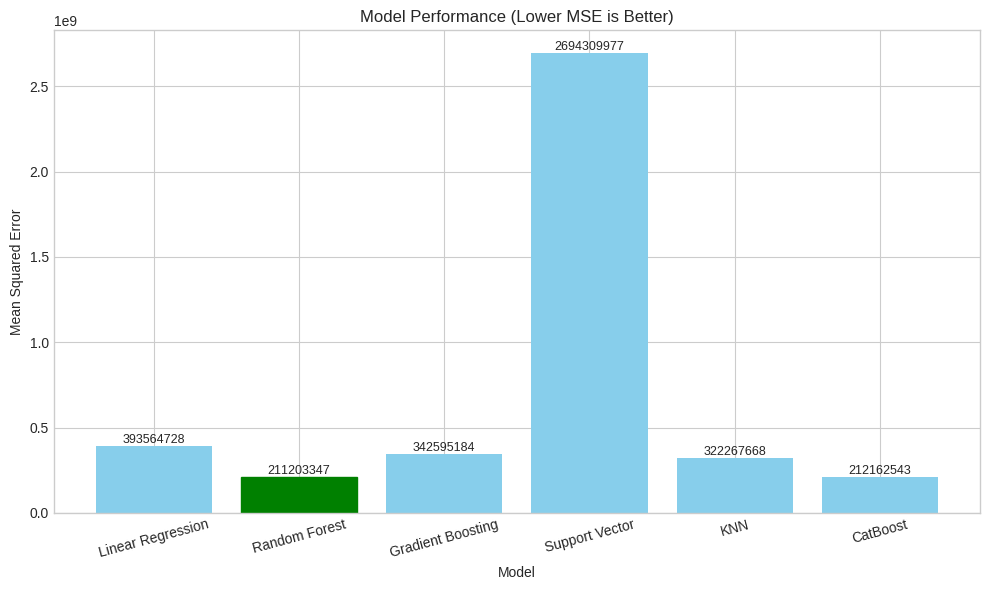

In [189]:
import matplotlib.pyplot as plt

# Plot model performance
model_names = list(results.keys())
mse_scores = [results[name]['mse'] for name in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mse_scores, color='skyblue')
plt.title('Model Performance (Lower MSE is Better)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.tight_layout()

# Highlight the best model
best_index = model_names.index(best_model_name)
bars[best_index].set_color('green')

# Annotate each bar with MSE value
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse_scores[i]:.0f}',
             ha='center', va='bottom', fontsize=9)

plt.show()


In [190]:
from sklearn.metrics import r2_score

# Train and evaluate each model
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'model': pipeline,
        'mse': mse,
        'r2': r2
    }
    print(f"{name}: MSE = {mse:.2f}, R² = {r2:.4f}")


Linear Regression: MSE = 393564728.47, R² = 0.8550
Random Forest: MSE = 211203346.80, R² = 0.9222
Gradient Boosting: MSE = 342595184.49, R² = 0.8738
Support Vector: MSE = 2694309976.84, R² = 0.0076
KNN: MSE = 322267667.64, R² = 0.8813
CatBoost: MSE = 220869442.32, R² = 0.9186


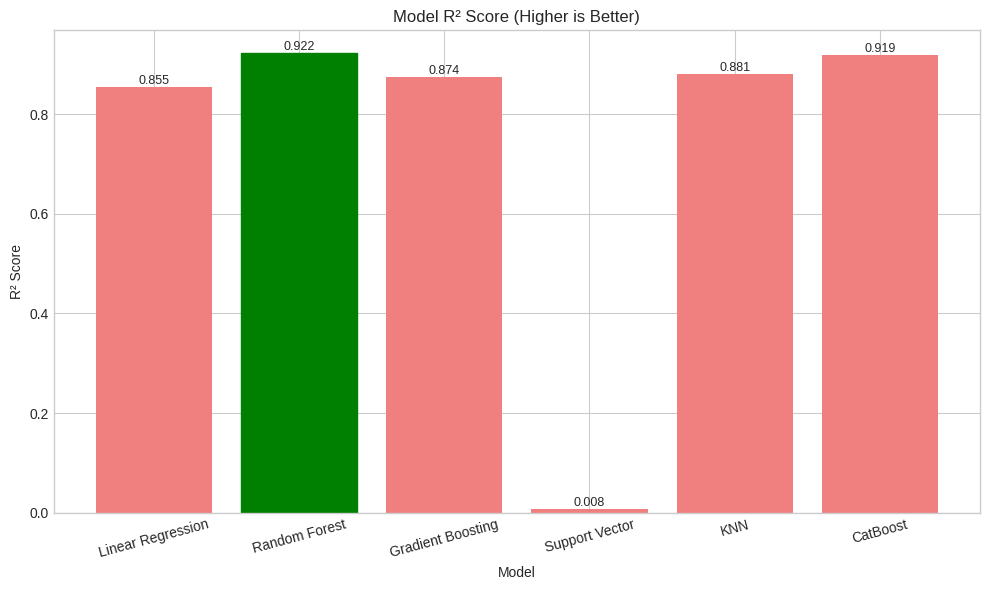

In [191]:
# Plot R² scores
r2_scores = [results[name]['r2'] for name in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color='lightcoral')
plt.title('Model R² Score (Higher is Better)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.tight_layout()

# Highlight the best model (by R² this time)
best_r2_index = r2_scores.index(max(r2_scores))
bars[best_r2_index].set_color('green')

# Annotate bars with R² values
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2_scores[i]:.3f}',
             ha='center', va='bottom', fontsize=9)

plt.show()




> Finding Best Model


In [192]:
best_model_name = min(results, key=lambda name: results[name]['mse'])
best_model = results[best_model_name]['model']

print(f"\n✅ Best Model: {best_model_name} with MSE = {results[best_model_name]['mse']:.2f}")



✅ Best Model: Random Forest with MSE = 211203346.80




> Saving the Best Model



In [193]:
!pip install joblib

import joblib

# Save the best model to a file
joblib.dump(best_model, f'{best_model_name.lower().replace(" ", "_")}_model.pkl')
print(f"✅ Saved best model: {best_model_name} to file '{best_model_name.lower().replace(' ', '_')}_model.pkl'")



✅ Saved best model: Random Forest to file 'random_forest_model.pkl'


## Depolying the Model

In [194]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Use it for prediction
predictions = loaded_model.predict(X_test)


In [195]:
!pip install streamlit

In [196]:
!pip install streamlit cloudflared joblib pandas --quiet

In [197]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load data and model
df = pd.read_csv("/kaggle/input/salary-data/Salary_Data.csv")
df_roles = sorted(df['Job Title'].dropna().unique().tolist())
df_roles.insert(0, "Select")

model = joblib.load("random_forest_model.pkl")  # Ensure model is in directory

# Dummy accuracy values for visualization (replace with real ones)
model_performance = {
    "Random Forest": 0.92,
    "Linear Regression": 0.85,
    "XGBoost": 0.87,
    "SVM": 0.08,
    "CatBoostRegressor": 0.91,
}

# Streamlit UI
st.set_page_config(page_title="Salary Prediction App", layout="centered")
st.title("💼 Salary Prediction App")

st.markdown("""
<style>
    .main { background-color: #f4f4f4; padding: 20px; border-radius: 10px; }
    .stButton>button { background-color: #4CAF50; color: white; font-weight: bold; }
</style>
""", unsafe_allow_html=True)

st.markdown("#### Fill in the details below to estimate your monthly salary:")

with st.form("salary_form", clear_on_submit=False):
    gender = st.radio("Select Gender", ["Male", "Female", "Other"])

    education = st.selectbox("Education Level", [
        "Select", "High School", "Bachelor's", "Master's", "PhD", "Other"
    ])

    job_title = st.selectbox("Job Title", df_roles, index=0, placeholder="Search or select a job title")

    age_group = st.selectbox("Age Group", [
        "Select", "20-30", "30-40", "40-50", "50-60", "60+"
    ])

    experience_group = st.selectbox("Experience Group", [
        "Select", "0-2 years", "2-5 years", "5-10 years", "10-15 years", "15+ years"
    ])

    submit = st.form_submit_button("Predict Salary")

    if submit:
        # Validate selections
        if "Select" in [education, job_title, age_group, experience_group]:
            st.error("⚠️ Please fill all fields before predicting.")
        elif age_group == "20-30" and experience_group in ["10-15 years", "15+ years"]:
            st.error("⚠️ Experience cannot be more than 10 years for Age Group 20-30.")
        else:
            # Show input summary
            st.markdown("### ✅ Your Input Summary:")
            st.write(pd.DataFrame({
                "Gender": [gender],
                "Education Level": [education],
                "Job Title": [job_title],
                "Age Group": [age_group],
                "Experience Group": [experience_group]
            }))

            # Predict
            input_data = pd.DataFrame({
                'Gender': [gender],
                'Education Level': [education],
                'Job Title': [job_title],
                'Age_Group': [age_group],
                'Experience_Group': [experience_group]
            })

            prediction = model.predict(input_data)
            st.success(f"🎯 Estimated Salary (Per Month): **₹ {int(prediction[0]):,}**")

            # Model info
            st.markdown("### 📊 Model Info:")
            st.markdown("- **Model Used:** Random Forest Regressor")
            st.markdown(f"- **Model Accuracy:** {model_performance['Random Forest']*100:.2f}% (on validation data)")

            # Accuracy comparison graph
            st.markdown("### 📈 Model Accuracy Comparison:")
            fig, ax = plt.subplots()
            ax.bar(model_performance.keys(), model_performance.values(), color='skyblue')
            ax.set_ylabel("Accuracy")
            ax.set_ylim(0, 1)
            st.pyplot(fig)


Overwriting app.py


In [198]:
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O cloudflared
!chmod +x cloudflared

In [200]:
# Start Streamlit
!streamlit run app.py &>/content/log.txt &

# Start Cloudflare tunnel
import time
time.sleep(3)
!./cloudflared tunnel --url http://localhost:8501


2025-07-29T09:00:35Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-07-29T09:00:35Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-07-29T09:00:38Z INF +--------------------------------------------------------------------------------------------+
2025-07-29T09:00:38Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-07-29T09:00:38Z INF |  https://classic-with-conduct-significant.trycloudflar